## I. INTRODUCTION TO PANDAS

Let's first import required packages.

In [1]:
import matplotlib.pyplot as plt
import datetime
import json
import requests
import pandas as pd

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 8)

## 1. Importing a `.csv` file

In this first part, we provide a static `.csv` file to get familiarized with `Pandas` http://pandas.pydata.org/ Python Data Analysis library. We first use the `read_csv` method without any optional arguments to see what we get.

In [2]:
df = pd.read_csv('data/data.csv')

df.head() # Display the 5 first rows

,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
0,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
1,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
2,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
3,2017/08/07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A
4,2017/08/07 15:59:20,1,11,-70,0.4,51,13,70b3d5499904775c,25.74,75.6,Monitoring station A


In [3]:
# Let's check the data type of df object
type(df)

pandas.core.frame.DataFrame

`DataFrame` data type is key in `Pandas` and offers many useful possibilities.

In [87]:
# ******* YOUR TURN *******
# Display the first 10 rows of the `df` data frame
# Hint: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

## Enter your code below and press (shift+Enter) to evaluate



To know the number of lines and columns, simply:

In [4]:
df.shape

(96, 11)

97 rows and 11 columns.

You might have noticed that we have no colum names and that the first row of our `data.csv` file has been interpreted as the column names. To solve it, we can explicitely specify these names.

In [5]:
column_names = ['time', 'channel', 'snr', 'rssi',
                'freq_error', 'bytes', 'packet_idx',
                'lora_mac', 'temperature', 'humidity',
                 'station_name']

In [6]:
df = pd.read_csv('data/data.csv', header=None, names=column_names)
df.head()

,time,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
0,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
1,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
3,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
4,2017/08/07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A


Take a look at the number of optional arguments that `.read_csv` method might receive: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

## 2. Selecting a subset of a dataframe

### Selection by label(s)

In [7]:
# Selecting all rows and two columns ()
df_selected = df.loc[:, ['time', 'temperature']]
df_selected.head()

,time,temperature
0,2017/08/07 15:59:01,25.10
1,2017/08/07 15:59:04,25.13
2,2017/08/07 15:59:07,25.19
3,2017/08/07 15:59:14,25.46
4,2017/08/07 15:59:17,25.60


In [8]:
# Selecting all rows with column from X to Y
df.loc[:, 'lora_mac':'humidity'].head()

,lora_mac,temperature,humidity
0,70b3d5499904775c,25.10,65.1
1,70b3d5499904775c,25.13,65.0
2,70b3d5499904775c,25.19,64.8
3,70b3d5499904775c,25.46,68.4
4,70b3d5499904775c,25.60,71.9


In [9]:
# Selecting rows with index from 0 to 3 and all columns
df.loc[0:3, :]

,time,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
0,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
1,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
3,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A


### Selection by positions(s)

In [10]:
# Selecting columns at position 7, 8 and 10 (starts at 0)
df.iloc[:, [7, 8, 10]].head()

,lora_mac,temperature,station_name
0,70b3d5499904775c,25.10,Monitoring station A
1,70b3d5499904775c,25.13,Monitoring station A
2,70b3d5499904775c,25.19,Monitoring station A
3,70b3d5499904775c,25.46,Monitoring station A
4,70b3d5499904775c,25.60,Monitoring station A


In [95]:
# ******* YOUR TURN *******
# Display the second and fourth row and first and third columns of the dataframe `df`
# Hints: you can use the .iloc method

## Enter your code below and press (shift+Enter) to evaluate


### The joy of time indexing
When dealing with time series, it is often convenient to select a subset of it (for instance all data from the same day or minutes, ...). Time indexing and selection helps.

In [11]:
# Indexing will make plotting and time queries easier
df.set_index(pd.DatetimeIndex(df['time']), inplace=True)

In [13]:
df.head()

,time,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
time,,,,,,,,,,,
2017-08-07 15:59:01,2017/08/07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
2017-08-07 15:59:04,2017/08/07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2017-08-07 15:59:07,2017/08/07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
2017-08-07 15:59:14,2017/08/07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
2017-08-07 15:59:17,2017/08/07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A


In [14]:
# Now, we don't need the time column anymore
df.drop('time', axis=1, inplace=True)

In [15]:
df.head(3)

,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
time,,,,,,,,,,
2017-08-07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
2017-08-07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2017-08-07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A


Now, we can carry out easilty **partial time selection**.

In [16]:
# For instance select only measurement done at 15:59
df.loc['2017-08-07 15:59']

,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
time,,,,,,,,,,
2017-08-07 15:59:01,1,11,-67,19.9,50,7,70b3d5499904775c,25.10,65.1,Monitoring station A
2017-08-07 15:59:04,1,12,-64,-2.0,50,8,70b3d5499904775c,25.13,65.0,Monitoring station A
2017-08-07 15:59:07,1,12,-68,0.2,50,9,70b3d5499904775c,25.19,64.8,Monitoring station A
2017-08-07 15:59:14,1,12,-70,0.4,51,11,70b3d5499904775c,25.46,68.4,Monitoring station A
2017-08-07 15:59:17,1,11,-70,0.4,51,12,70b3d5499904775c,25.60,71.9,Monitoring station A
2017-08-07 15:59:20,1,11,-70,0.4,51,13,70b3d5499904775c,25.74,75.6,Monitoring station A
2017-08-07 15:59:23,1,12,-68,0.4,51,14,70b3d5499904775c,25.88,78.8,Monitoring station A
2017-08-07 15:59:26,1,12,-68,0.3,51,15,70b3d5499904775c,26.03,81.2,Monitoring station A
2017-08-07 15:59:30,1,12,-67,0.3,51,16,70b3d5499904775c,26.17,83.2,Monitoring station A


### Selecting by values
We want here to select all measurements where temperature is higher then 30 degrees celsius.

In [20]:
df[df.temperature > 30]

,channel,snr,rssi,freq_error,bytes,packet_idx,lora_mac,temperature,humidity,station_name
time,,,,,,,,,,
2017-08-07 16:02:06,1,11,-60,-0.0,52,65,70b3d5499904775c,30.78,115.6,Monitoring station A
2017-08-07 16:02:12,1,12,-60,-0.0,50,67,70b3d5499904775c,30.08,9.2,Monitoring station A
2017-08-07 16:02:16,1,12,-58,-0.1,51,68,70b3d5499904775c,30.52,17.3,Monitoring station A
2017-08-07 16:02:19,1,12,-57,-0.0,51,69,70b3d5499904775c,31.05,20.8,Monitoring station A
2017-08-07 16:02:22,1,12,-57,-0.0,51,70,70b3d5499904775c,31.05,22.1,Monitoring station A
2017-08-07 16:02:25,1,12,-57,0.0,51,71,70b3d5499904775c,30.30,23.6,Monitoring station A
2017-08-07 16:03:55,1,12,-54,0.2,52,99,70b3d5499904775c,30.87,107.4,Monitoring station A


## 3. Plotting

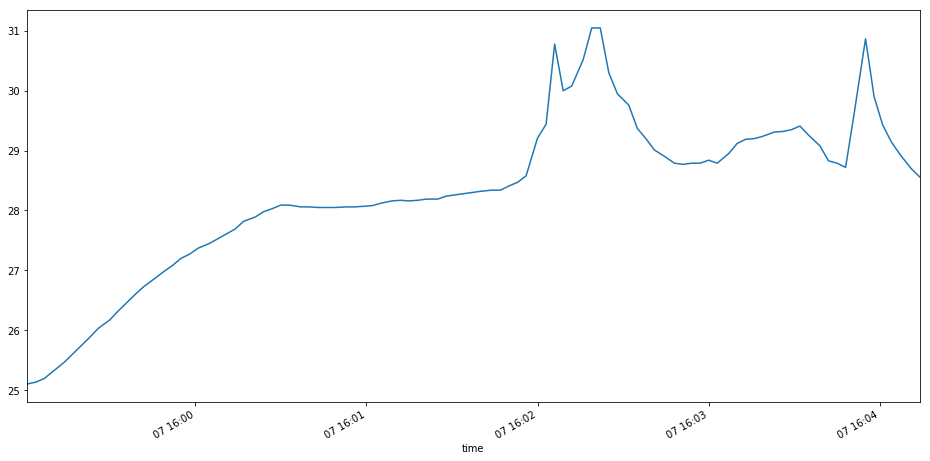

In [21]:
# Really can you make it easier?
df['temperature'].plot()

[<matplotlib.text.Text at 0x11d76c358>, <matplotlib.text.Text at 0x11d75b5f8>]

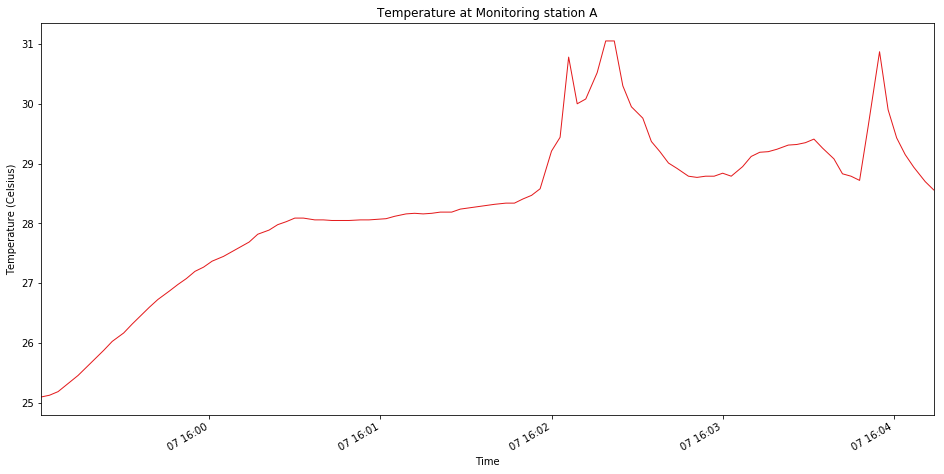

In [22]:
# Many options
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

ax = df['temperature'].plot(lw=1, colormap='Set1', title='Temperature at Monitoring station A')
ax.set(xlabel="Time", ylabel="Temperature (Celsius)")

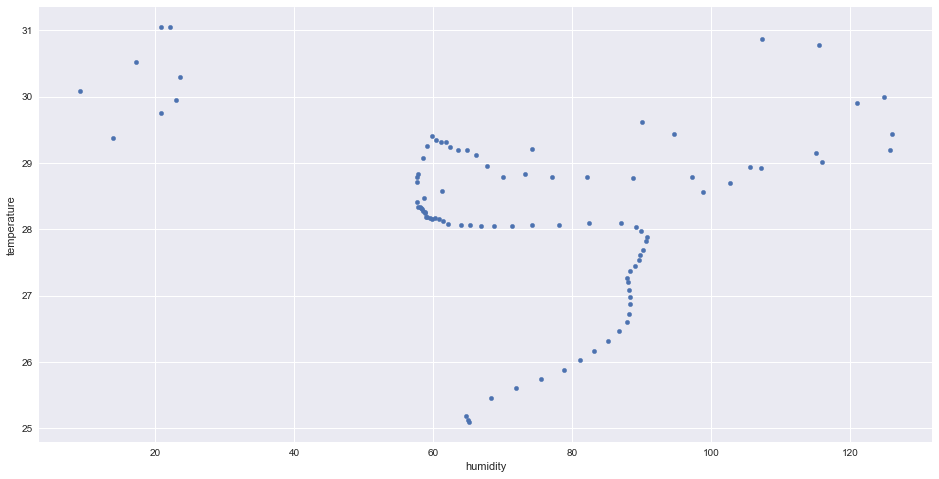

In [103]:
# Look at relationship between humidity and temperature. Interpret???
df.plot.scatter('humidity', 'temperature')

## 4. Plotting several time series

Here we want to plot several time series at aonce. We provide a second dataset including time series of monthly temperature in several African countries from 1901 to 2005.

Sources: http://sdwebx.worldbank.org/climateportal/index.cfm?page=downscaled_data_download&menu=historical

In [27]:
df_africa = pd.read_csv('data/ts_temp_africa.csv')

In [28]:
df_africa.head()

,tas,date,name
0,22.2717,1901-01-01,Sudan
1,25.1677,1901-02-01,Sudan
2,27.1083,1901-03-01,Sudan
3,28.9440,1901-04-01,Sudan
4,30.4281,1901-05-01,Sudan


In [32]:
# Here below the list of included countries 
df_africa.groupby('name').count().index

Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', 'Côte d'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Sudan'],
      dtype='object', name='name')

In [34]:
# Again let's add a time index
df_africa.set_index(pd.DatetimeIndex(df_africa['date']), inplace=True)

In [35]:
df_africa.drop('date', axis=1, inplace=True)

In [36]:
df_africa.head()

,tas,name
date,,
1901-01-01,22.2717,Sudan
1901-02-01,25.1677,Sudan
1901-03-01,27.1083,Sudan
1901-04-01,28.9440,Sudan
1901-05-01,30.4281,Sudan


In [37]:
# Now comes the magic of Pandas
df_africa_rot = df_africa.pivot(columns='name', values='tas')

In [38]:
df_africa_rot.head()

name,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Republic,Chad,Comoros,Congo,Côte d'Ivoire,Djibouti,Egypt,Equatorial Guinea,Eritrea,Ethiopia,Gabon,Sudan
date,,,,,,,,,,,,,,,,,,,,
1901-01-01,12.0806,22.6912,24.8714,26.7184,22.9305,20.1005,21.3606,23.7460,24.1947,20.6576,25.0430,24.6351,24.8861,23.6027,12.7916,24.8265,22.7404,21.4340,25.4648,22.2717
1901-02-01,14.2311,22.7454,28.3487,25.9084,27.5229,20.2301,21.5441,25.3324,26.0657,23.1814,25.0968,25.2827,27.8502,24.9196,16.5179,25.3365,24.6940,23.0475,25.7578,25.1677
1901-03-01,17.8110,22.5434,28.9665,24.6126,29.2438,20.2801,21.6221,25.9880,26.9181,26.5562,26.0320,25.1860,27.8245,26.2823,19.0889,24.7173,25.5125,23.8133,25.4344,27.1083
1901-04-01,22.6980,21.7076,29.6790,21.9750,31.3461,20.2406,22.6734,26.3637,26.7826,29.5472,26.5716,25.2860,27.7258,27.6365,22.5923,25.0810,27.1085,23.9284,25.7031,28.9440
1901-05-01,25.9776,20.7716,28.4150,17.4224,30.2692,19.9333,21.5232,25.5568,25.9309,30.9551,25.4725,25.2754,26.7334,29.4531,25.6290,25.1117,28.8672,23.8515,25.6669,30.4281


What happened?

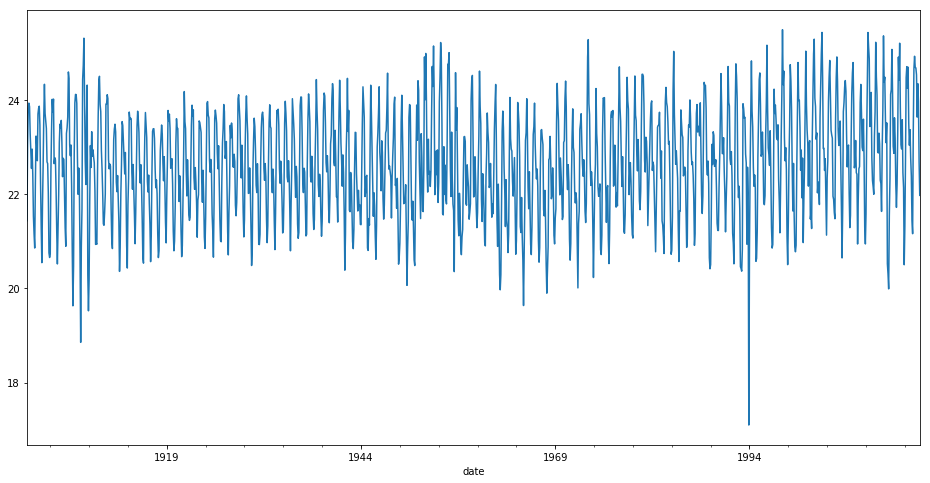

In [40]:
# Now to see Ethiopia's temperature between 1901 and 2005, simply:
df_africa_rot['Ethiopia'].plot()

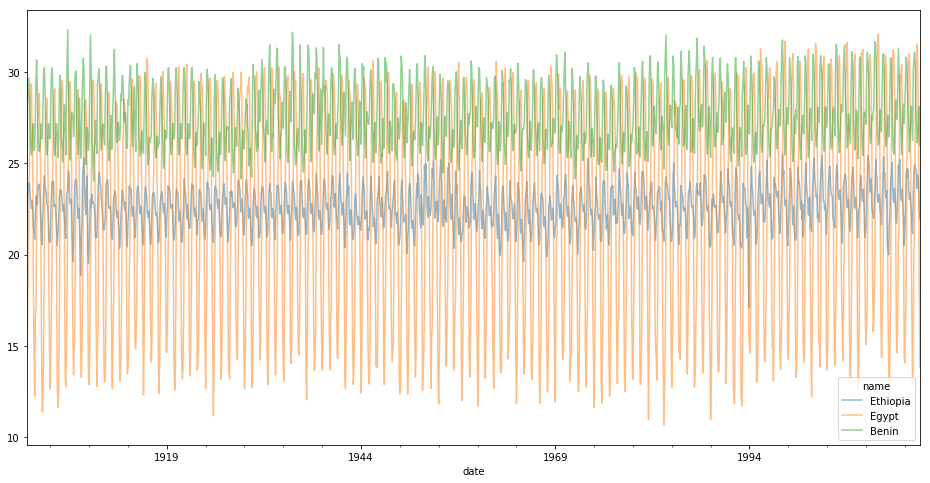

In [42]:
# And to visualize several of them
df_africa_rot[['Ethiopia', 'Egypt', 'Benin']].plot(alpha=0.5)

And now the cherry on the cake! We select both years and countries of interest.

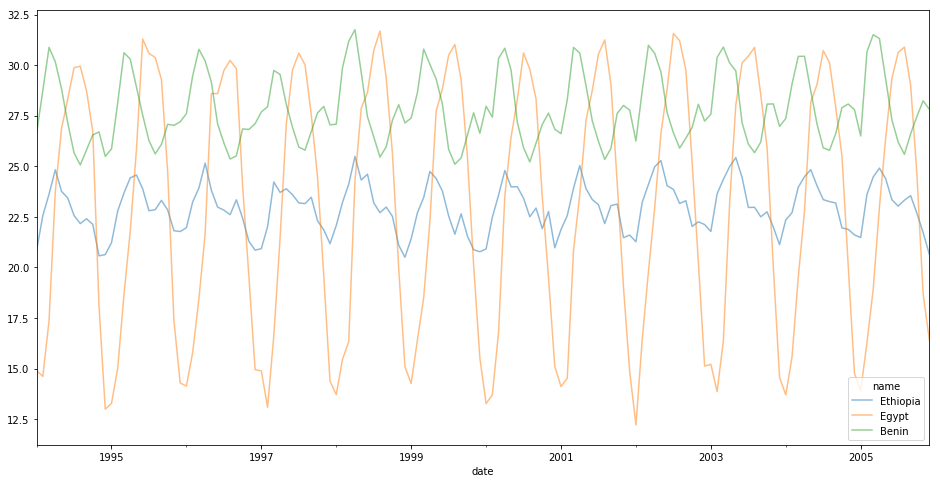

In [45]:
df_africa_rot.loc['1994':'2005', ['Ethiopia', 'Egypt', 'Benin']].plot(alpha=0.5)

As simple as that!